# Точечные и интервальные оценки экспоненциального распределения

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
%matplotlib inline 


SIZE = 100
SCALE = 5
LOC = 2

B = 0.95


dist = LOC + np.random.exponential(scale=SCALE, size=100)

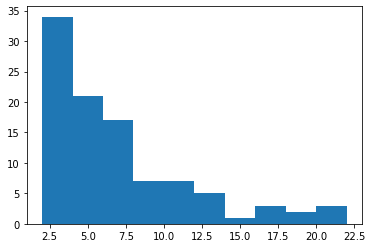

(2.0126037153434866, 5.0217284934176085)


In [54]:
plt.hist(dist)
plt.show()

print(expon.fit(dist))